<a href="https://colab.research.google.com/github/rashelmia/Bangla-Short-Story-Categorization/blob/main/LSTM_for_Bangla_short_story_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/cleaned_dataset.csv')

In [ ]:
df

,Title,Author,Text,Category,Clean_Text
0,❤তোর মতো কেউ নেই ❤...পর্ব ৭,রিমা ব্যানার্জি 🍁✒,❤ পর্ব ৭❤ বাড়িতে পুজো আছে anniversary ...,2,পর্ব বাড়িতে পুজো টিয়া বলেছিল মাথায় রেখেই রুদ্র...
1,বড় হওয়ার গপ্পো,গৌরব বিশ্বাস,এ গল্প আমার বড় হওয়ার গল্প। পাঠকগ্ণ নিশ্...,1,গল্প বড় হওয়ার গল্প । পাঠকগ্ণ নিশ্চই টানটান হয়ে...
2,রমেশের ডেলিভারি,সুজিত ঘোষ,টিং-টং করে দরজার বেল বাজালাম!ওপার থেকে আ...,0,টিংটং দরজার বেল বাজালামওপার আওয়াজ বললাম রমেশকি...
3,Your_Love_Is_My_Addiction💖 part--- 12,"মানাই ঘোষ ""তিথি""",Your _Love_Is_My_Addiction💖 part--- 12 . ...,1,মিহুর বাবামার বিদায় গেলো মেঘ । মেঘের ঠোঁটের কো...
4,♥️রোমান্টিক বসের ভালোবাসা ♥️,💞রিধি সেন💞,গল্প : রোমান্টিক 😍বসের ভালোবাসা পর্ব : ...,1,গল্প রোমান্টিক বসের ভালোবাসা পর্ব তানিয়া উফএই ...
...,...,...,...,...,...
5806,ডায়েরির শেষ পাতাটা পর্ব-৩২,"Sadia Afrin ""Sarah""",""""""" দুটা ক্লাস করিয়েই ছুটি দিয়ে দেওয...",2,দুটা ক্লাস করিয়েই ছুটি । স্টুডেন্ট কোটা একটা ...
5807,The White Eyes- End of A journey.,Akash Chatterjee,The White Eyes - End of A journey (এই ...,0,গল্প পড়ার আগের অংশ আপনাদের পড়তে নাহলে বুঝতে ...
5808,ফেরা,মধুমিতা মুখার্জী,বহুদিন হল বর্দ্ধমানের দেশের বাড়ির কালি প...,0,বহুদিন বর্দ্ধমানের দেশের বাড়ির কালি পুজোয় যায়ন...
5809,খোপ থেকে বেরলো পোপ,Sudip Chakraborty,আপনাদের কি কারো স্মরণে আছে কোলকাতায় আশির...,1,আপনাদের কারো স্মরণে কোলকাতায় আশির দশকে এক সময়ে...


In [ ]:
# Check NA counts
df.isnull().sum()

Title         0
Author        0
Text          0
Category      0
Clean_Text    0
dtype: int64

In [ ]:
pd.value_counts(df.Category)


2    2000
1    2000
0    1811
Name: Category, dtype: int64

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
set(df.Category)


{0, 1, 2}

In [ ]:
# Drop rows with missing values
model_f = df.dropna()
print(model_f.shape[0])

5811


2    2000
1    2000
0    1811
Name: Category, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


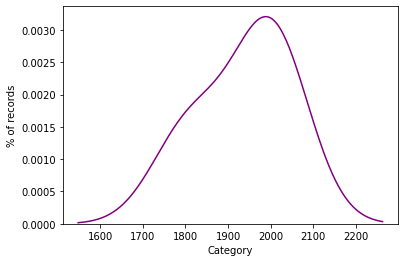

In [ ]:
# Look at classification type counts
counts = model_f.Category.value_counts()
print(counts)
#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.ylabel('% of records')
plt.show()

In [ ]:
max_length=model_f["Clean_Text"].str.len().max()
print(max_length)

29119


In [ ]:
model_f.head()

,Title,Author,Text,Category,Clean_Text
0,উপমহাদেশীয়,অরিজিৎ মিত্র,কাচের জানলা......পর্দাগুলো হাট করে খোলা। ...,1,কাচের জানলাপর্দাগুলো হাট খোলা । সেদিকে তাকালে ...
1,স্যান্ডওয়াচ,পিয়াসা,স্যান্ডওয়াচ পিয়াসা - না সার...,0,স্যান্ডওয়াচ পিয়াসা সার্থক প্লিজ ছেড়ে দাও প্লিজ...
2,ভৌতিক গল্প- জন্মান্তর,"Sumana Das ""Sumana""",ভৌতিক গল্প- জন্মান্তর ...,0,ভৌতিক গল্প জন্মান্তর সুদেববাবুর বাড়ি কলকাতায় ।...
3,অতৃপ্তি সব্যসাচী সেন,Sabyasachi Sen,অতৃপ্তি ১) ওলা বাইকেই অফিস যাতায়াত করে ...,0,অতৃপ্তি ওলা বাইকেই অফিস যাতায়াত পৌলমী । ফ্ল্য...
4,অবশেষে ভালোবেসেঃ ৩৫,"Meherun Nesa ""কল্পনা বিলাসী""",অবশেষে ভালোবেসে (৩৫) কিছুক্ষন পর নার্স ট...,2,অবশেষে ভালোবেসে কিছুক্ষন নার্স আরো দুইজন এক্সট...


In [ ]:
train=model_f
a=train.Category.unique()
l=len(a)
print(a)

[1 0 2]


In [ ]:

train.Category.head()

0    1
1    0
2    0
3    0
4    2
Name: Category, dtype: int64

In [ ]:
train.Category.value_counts()

2    2000
1    2000
0    1811
Name: Category, dtype: int64

In [ ]:
df = train
df.Category = df.Category.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
#from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import GlobalMaxPool1D
#from keras.utils import plot_model
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import RFE
import re

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~।', lower=False)
tokenizer.fit_on_texts(df.Clean_Text.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 277039 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df.Clean_Text .values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5811, 250)


In [ ]:
Y = pd.get_dummies(df.Category).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (5811, 3)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(l, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

#plot_model(model,'qw.png',show_shapes=True)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 771       
Total params: 5,059,651
Trainable params: 5,059,651
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 10
batch_size = 128

In [ ]:
history = model.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
37/37 [==============================] - 20s 483ms/step - loss: 1.0829 - accuracy: 0.4016 - val_loss: 0.9628 - val_accuracy: 0.6233
Epoch 2/10
37/37 [==============================] - 17s 463ms/step - loss: 0.6670 - accuracy: 0.7421 - val_loss: 0.5933 - val_accuracy: 0.7725
Epoch 3/10
37/37 [==============================] - 17s 460ms/step - loss: 0.2025 - accuracy: 0.9395 - val_loss: 0.5509 - val_accuracy: 0.7916
Epoch 4/10
37/37 [==============================] - 17s 460ms/step - loss: 0.0912 - accuracy: 0.9768 - val_loss: 0.5467 - val_accuracy: 0.8069
Epoch 5/10
37/37 [==============================] - 17s 462ms/step - loss: 0.0798 - accuracy: 0.9783 - val_loss: 0.5595 - val_accuracy: 0.8011
Epoch 6/10
37/37 [==============================] - 17s 463ms/step - loss: 0.0600 - accuracy: 0.9806 - val_loss: 0.5280 - val_accuracy: 0.8279
Epoch 7/10
37/37 [==============================] - 17s 462ms/step - loss: 0.0679 - accuracy: 0.9773 - val_loss: 0.5514 - val_accuracy: 0.8088

In [ ]:
accr = model.evaluate(test_features,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

19/19 [==============================] - 1s 34ms/step - loss: 0.6219 - accuracy: 0.8247
Test set
  Loss: 0.622
  Accuracy: 0.825


In [ ]:
from google.colab import files

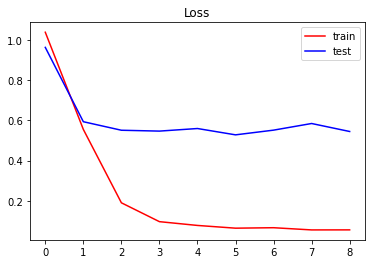

In [ ]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],'b', label='test')
plt.legend()
plt.savefig('plot_loss.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
files.download("plot_loss.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

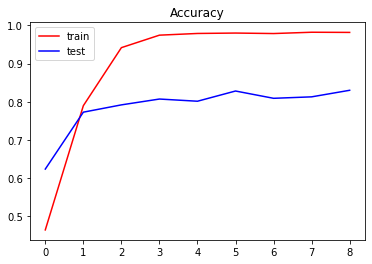

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'r', label='train')
plt.plot(history.history['val_accuracy'],'b', label='test')
plt.legend()
plt.savefig('plot_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
files.download("plot_accuracy.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predicted_classes = model.predict(test_features)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
#test_Y = np.argmax(np.round(test_labels),axis=1)

In [ ]:
predicted_classes.shape, test_labels.shape
print(test_labels.shape)

(582, 3)


In [ ]:
test_Y=[]
for i in range (582):
    for j in range (3):
        if(test_labels[i][j]==1):
            test_Y.append(j)
print(len(test_Y))

582


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.92      0.88       180
     Class 1       0.75      0.84      0.80       193
     Class 2       0.89      0.72      0.80       209

    accuracy                           0.82       582
   macro avg       0.83      0.83      0.82       582
weighted avg       0.83      0.82      0.82       582



In [ ]:
name=[]
for i in range(3):
  name.append(i)


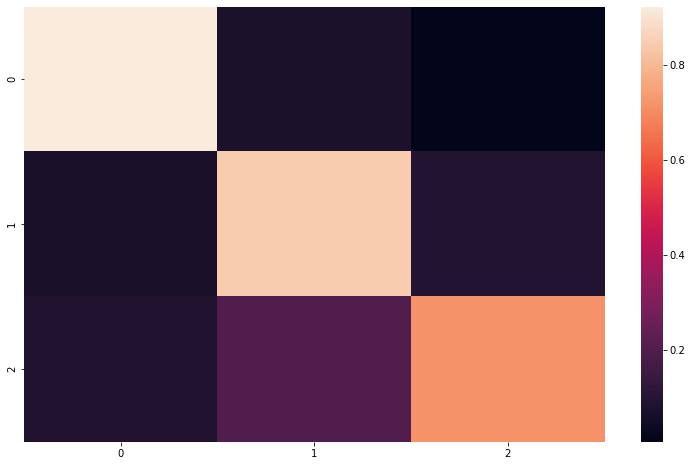

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(test_Y, predicted_classes, labels = name)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[166  13   1]
 [ 13 163  17]
 [ 18  41 150]]
Normalized confusion matrix
[[0.92 0.07 0.01]
 [0.07 0.84 0.09]
 [0.09 0.2  0.72]]


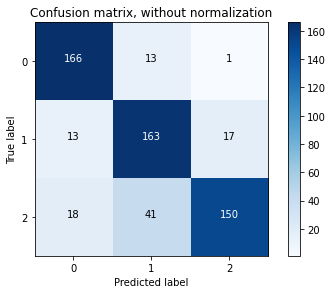

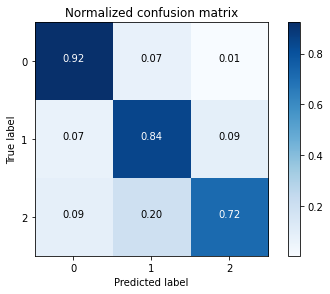

In [ ]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('confussion_matrix_without_normalization.png', dpi=300, bbox_inches='tight')


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('confussion_matrix_with_normalization.png', dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
files.download("confussion_matrix_without_normalization.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("confussion_matrix_with_normalization.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>